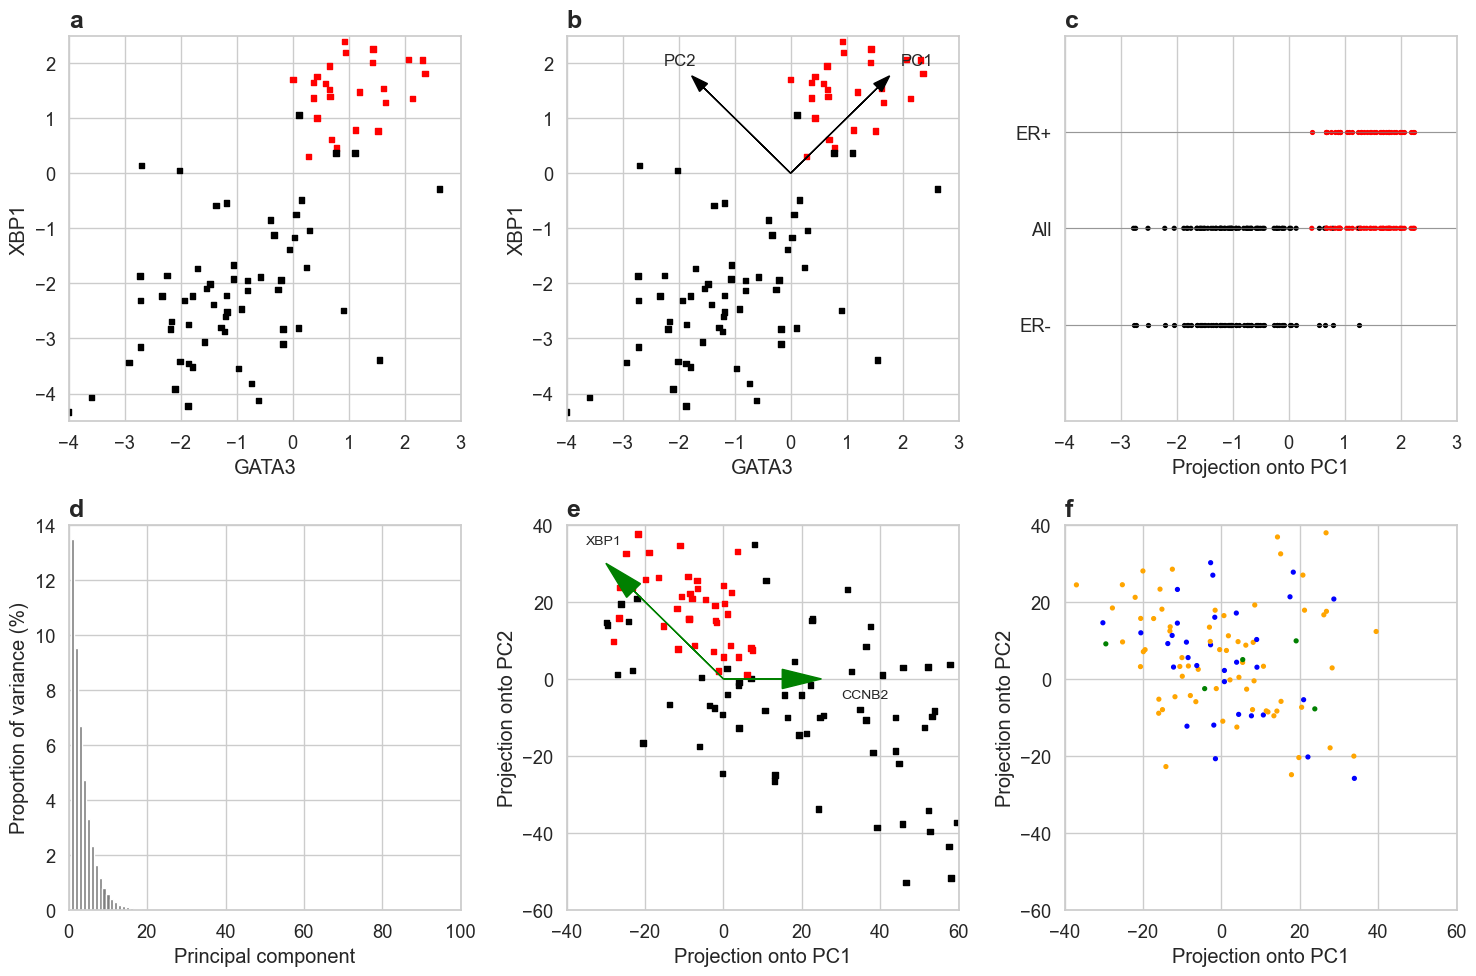

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

n_samples = 105

class_labels = np.array([0] * 63 + [1] * 42)  # 0=ER-, 1=ER+
np.random.shuffle(class_labels)

xbp1 = np.zeros(n_samples)
gata3 = np.zeros(n_samples)

for i in range(n_samples):
    if class_labels[i] == 1:  # ER+ (red)
        gata3[i] = np.random.normal(1.2, 0.7)  # More concentrated in upper right
        xbp1[i] = np.random.normal(1.2, 0.7)
    else:  # ER- (black)
        gata3[i] = np.random.normal(-1.0, 1.3)  # More spread out
        xbp1[i] = np.random.normal(-1.5, 1.2)

# Add correlation to match the pattern
xbp1 += 0.6 * gata3 + np.random.normal(0, 0.4, n_samples)

# Create the data matrix
X = np.column_stack((gata3, xbp1))

X_standardized = StandardScaler().fit_transform(X)


pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)

# Create figure with 6 subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# a: Original data scatter plot (GATA3 vs XBP1)
ax = axes[0, 0]
ax.scatter(X[:, 0], X[:, 1],
           c=['red' if c == 1 else 'black' for c in class_labels],
           marker='s', s=15)
ax.set_xlabel('GATA3')
ax.set_ylabel('XBP1')
ax.set_title('a', fontsize=18, loc='left', weight='bold')
ax.set_xlim(-4, 3)
ax.set_ylim(-4.5, 2.5)

# b: Original data with PCA vectors
ax = axes[0, 1]
ax.scatter(X[:, 0], X[:, 1],
           c=['red' if c == 1 else 'black' for c in class_labels],
           marker='s', s=15)

eigenvectors = pca.components_
# Ensure PC1 points to upper right and PC2 to upper left as in the image
if eigenvectors[0, 0] < 0:
    eigenvectors[0] = -eigenvectors[0]
if eigenvectors[1, 1] < 0:
    eigenvectors[1] = -eigenvectors[1]

scale = 2.5
ax.arrow(0, 0, scale * eigenvectors[0, 0], scale * eigenvectors[0, 1],
         head_width=0.2, head_length=0.3, fc='black', ec='black', length_includes_head=True)
ax.arrow(0, 0, scale * eigenvectors[1, 0], scale * eigenvectors[1, 1],
         head_width=0.2, head_length=0.3, fc='black', ec='black', length_includes_head=True)
# Add PC labels (positioned as in reference image)
ax.text(scale * eigenvectors[0, 0] + 0.2, scale * eigenvectors[0, 1] + 0.2, "PC1", fontsize=12)
ax.text(scale * eigenvectors[1, 0] - 0.5, scale * eigenvectors[1, 1] + 0.2, "PC2", fontsize=12)
ax.set_xlabel('GATA3')
ax.set_ylabel('XBP1')
ax.set_title('b', fontsize=18, loc='left', weight='bold')
ax.set_xlim(-4, 3)
ax.set_ylim(-4.5, 2.5)

# c: Projection onto PC1 with classes
ax = axes[0, 2]

y_levels = {'All': 0, 'ER-': -0.5, 'ER+': 0.5}
# Add horizontal lines
ax.axhline(y=y_levels['All'], color='gray', linestyle='-', linewidth=0.5)
ax.axhline(y=y_levels['ER-'], color='gray', linestyle='-', linewidth=0.5)
ax.axhline(y=y_levels['ER+'], color='gray', linestyle='-', linewidth=0.5)

ax.scatter(principal_components[:, 0], np.zeros(n_samples) + y_levels['All'],
           c=['red' if c == 1 else 'black' for c in class_labels],
           marker='.', s=30)
# Plot ER-  on "ER-" line
er_neg_mask = class_labels == 0
ax.scatter(principal_components[er_neg_mask, 0],
           np.zeros(sum(er_neg_mask)) + y_levels['ER-'],
           c='black', marker='.', s=30)
# Plot ER+  on "ER+" line
er_pos_mask = class_labels == 1
ax.scatter(principal_components[er_pos_mask, 0],
           np.zeros(sum(er_pos_mask)) + y_levels['ER+'],
           c='red', marker='.', s=30)
ax.set_xlabel('Projection onto PC1')
ax.set_yticks(list(y_levels.values()))
ax.set_yticklabels(list(y_levels.keys()))
ax.set_title('c', fontsize=18, loc='left', weight='bold')
ax.set_xlim(-4, 3)
ax.set_ylim(-1, 1)

# d: Proportion of variance (scree plot)
ax = axes[1, 0]
n_components = 100

variance_ratio = np.zeros(n_components)
variance_ratio[0] = 13.5 
for i in range(1, n_components):
    variance_ratio[i] = 13.5 * np.exp(-0.35 * i) 
# Create bar plot for variance
ax.bar(range(1, n_components + 1), variance_ratio, color='gray', width=0.8)
ax.set_xlabel('Principal component')
ax.set_ylabel('Proportion of variance (%)')
ax.set_title('d', fontsize=18, loc='left', weight='bold')
ax.set_ylim(0, 14)
ax.set_xlim(0, 100)

# e: PC2 vs PC1 with gene vectors
ax = axes[1, 1]

pc1_range = (-40, 60)
pc2_range = (-60, 40)
# Generate scattered points with distribution matching the image
pc1_scattered = np.zeros(n_samples)
pc2_scattered = np.zeros(n_samples)
# Create pattern with ER+ (red) points more in upper left quadrant
for i in range(n_samples):
    if class_labels[i] == 1:  # ER+ (red)
        pc1_scattered[i] = np.random.uniform(-30, 10)
        pc2_scattered[i] = -0.8 * pc1_scattered[i] + np.random.normal(15, 8)
    else:  # ER- (black)
        pc1_scattered[i] = np.random.uniform(-30, 60)
        pc2_scattered[i] = -0.4 * pc1_scattered[i] + np.random.normal(0, 15)
# Plot data points
ax.scatter(pc1_scattered, pc2_scattered,
           c=['red' if c == 1 else 'black' for c in class_labels],
           marker='s', s=15)

xbp1_pos = (-30, 30)  # XBP1 position
ccnb2_pos = (25, 0)   # CCNB2 position
ax.arrow(0, 0, xbp1_pos[0], xbp1_pos[1], head_width=5, head_length=10, fc='green', ec='green', length_includes_head=True)
ax.arrow(0, 0, ccnb2_pos[0], ccnb2_pos[1], head_width=5, head_length=10, fc='green', ec='green', length_includes_head=True)
ax.text(xbp1_pos[0] - 5, xbp1_pos[1] + 5, "XBP1", fontsize=10)
ax.text(ccnb2_pos[0] + 5, ccnb2_pos[1] - 5, "CCNB2", fontsize=10)
ax.set_xlabel('Projection onto PC1')
ax.set_ylabel('Projection onto PC2')
ax.set_title('e', fontsize=18, loc='left', weight='bold')
ax.set_xlim(pc1_range)
ax.set_ylim(pc2_range)

# f: Additional visualization with different color groups
ax = axes[1, 2]

n_orange = 68
n_blue = 32
n_green_f = 5
f_groups_exact = np.array([0] * n_orange + [1] * n_blue + [2] * n_green_f)
np.random.shuffle(f_groups_exact)
group_colors = ['orange', 'blue', 'green']
colors_exact = [group_colors[g] for g in f_groups_exact]

# Create scattered points with a distribution similar to the image
pc1_scattered_f = np.random.uniform(pc1_range[0], pc1_range[1], n_samples)
pc2_scattered_f = np.random.uniform(pc2_range[0], pc2_range[1], n_samples)

# Adjust the scatter for visual similarity 
pc1_scattered_f[:n_orange] = np.random.normal(loc=5, scale=15, size=n_orange)
pc2_scattered_f[:n_orange] = np.random.normal(loc=0, scale=15, size=n_orange)
pc1_scattered_f[n_orange:n_orange + n_blue] = np.random.normal(loc=-15, scale=10, size=n_blue)
pc2_scattered_f[n_orange:n_orange + n_blue] = np.random.normal(loc=10, scale=10, size=n_blue)
pc1_scattered_f[n_orange + n_blue:] = np.random.normal(loc=30, scale=5, size=n_green_f)
pc2_scattered_f[n_orange + n_blue:] = np.random.normal(loc=-20, scale=5, size=n_green_f)


ax.scatter(pc1_scattered_f, pc2_scattered_f, c=colors_exact, marker='.', s=30)

ax.set_xlabel('Projection onto PC1')
ax.set_ylabel('Projection onto PC2')
ax.set_title('f', fontsize=18, loc='left', weight='bold')
ax.set_xlim(pc1_range)
ax.set_ylim(pc2_range)

plt.tight_layout()
plt.savefig('pca_visualization_matched.png', dpi=300)
plt.show()